# Prediction of car prices based on their condition


![image](https://storage.googleapis.com/kaggle-datasets-images/1479517/2444963/1aaa3760e7dd34a87af175482c1514ae/dataset-cover.jpg?t=2021-07-21-09-56-46)

Data extracted from kaggle. Click [here](https://www.kaggle.com/datasets/sidharth178/car-prices-dataset) to see it.

## First view at the data <a id="section1"></a>

In [1]:
import os
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    print("Running on Kaggle")
    data_dir = "../input/car-prices-dataset"
else:
    print("Not running on Kaggle")
    data_dir = "archive"

Not running on Kaggle


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# We already have the data partitioned
original_df = pd.read_csv(f"{data_dir}/train.csv")
df_train, df_test = train_test_split(original_df, test_size=0.05, random_state=42)

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)


print(f"Shape: {df_train.shape}")
df_train.head()

Shape: (18275, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45763444,549,777,MAZDA,1300,2014,Jeep,Yes,Petrol,2.5,79094 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
1,45761182,188,289,FORD,Escape,2008,Sedan,Yes,Hybrid,0.4,209843 km,4.0,Automatic,Front,04-May,Left wheel,Grey,0
2,45661036,6272,1624,MERCEDES-BENZ,ML 350,2009,Jeep,Yes,Diesel,3.5,274088 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
3,45780214,10000,-,NISSAN,Tiida,2007,Hatchback,Yes,Petrol,1.5,145000 km,5.0,Variator,Front,04-May,Right-hand drive,Silver,2
4,45787173,17405,-,TOYOTA,Prius,2010,Hatchback,No,Hybrid,1.8,200000 km,4.0,Tiptronic,Front,04-May,Left wheel,Black,6


In [3]:
df_train.isna().sum() # Below we can see the data is extremely clean; this is not common at all

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [4]:
sorted(df_train["Prod. year"].unique())

[1939,
 1943,
 1947,
 1953,
 1957,
 1964,
 1965,
 1968,
 1973,
 1974,
 1976,
 1977,
 1978,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [5]:
import re

def clean(df):
    df = df.copy()
    df["Leather interior"] = df["Leather interior"].apply(lambda x: 1 if x=="Yes" else 0) # Numeric atributes are much easier to manage
    df.drop(["ID", "Levy"], axis=1, inplace=True)
    df["Engine volume"] = df["Engine volume"].apply(lambda x: float(x.split(" ")[0]))
    df["Mileage"] = df["Mileage"].apply(lambda x: float(x.split(" ")[0]))
    df["Doors"] = df["Doors"].apply(lambda x: np.int64(re.findall(r'\d+', x)[0]))
    return df

print("We have a {:.2%} of null levies".format(df_train['Levy'].apply(lambda x: x=='-').sum() / df_train.shape[0]))
print("It is very high, so we won't be using that feature")

df_train = clean(df_train)
df_train.info()

We have a 30.22% of null levies
It is very high, so we won't be using that feature
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18275 entries, 0 to 18274
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18275 non-null  int64  
 1   Manufacturer      18275 non-null  object 
 2   Model             18275 non-null  object 
 3   Prod. year        18275 non-null  int64  
 4   Category          18275 non-null  object 
 5   Leather interior  18275 non-null  int64  
 6   Fuel type         18275 non-null  object 
 7   Engine volume     18275 non-null  float64
 8   Mileage           18275 non-null  float64
 9   Cylinders         18275 non-null  float64
 10  Gear box type     18275 non-null  object 
 11  Drive wheels      18275 non-null  object 
 12  Doors             18275 non-null  int64  
 13  Wheel             18275 non-null  object 
 14  Color             18275 non-null  object 
 15  Airb

In [6]:
df_train.describe()

,Price,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags
count,1.827500e+04,18275.000000,18275.000000,18275.000000,1.827500e+04,18275.000000,18275.000000,18275.000000
mean,1.860851e+04,2010.922353,0.726129,2.308137,1.550488e+06,4.582599,3.925636,6.591464
std,1.954863e+05,5.656568,0.445956,0.879126,4.910818e+07,1.200536,0.404631,4.325122
min,1.000000e+00,1939.000000,0.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,5.300000e+03,2009.000000,0.000000,1.800000,7.002350e+04,4.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,1.000000,2.000000,1.262650e+05,4.000000,4.000000,6.000000
75%,2.200000e+04,2015.000000,1.000000,2.500000,1.890000e+05,4.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,1.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


In [7]:
import matplotlib.pyplot as plt

Y = df_train.select_dtypes(include = ["float64", "int64"])

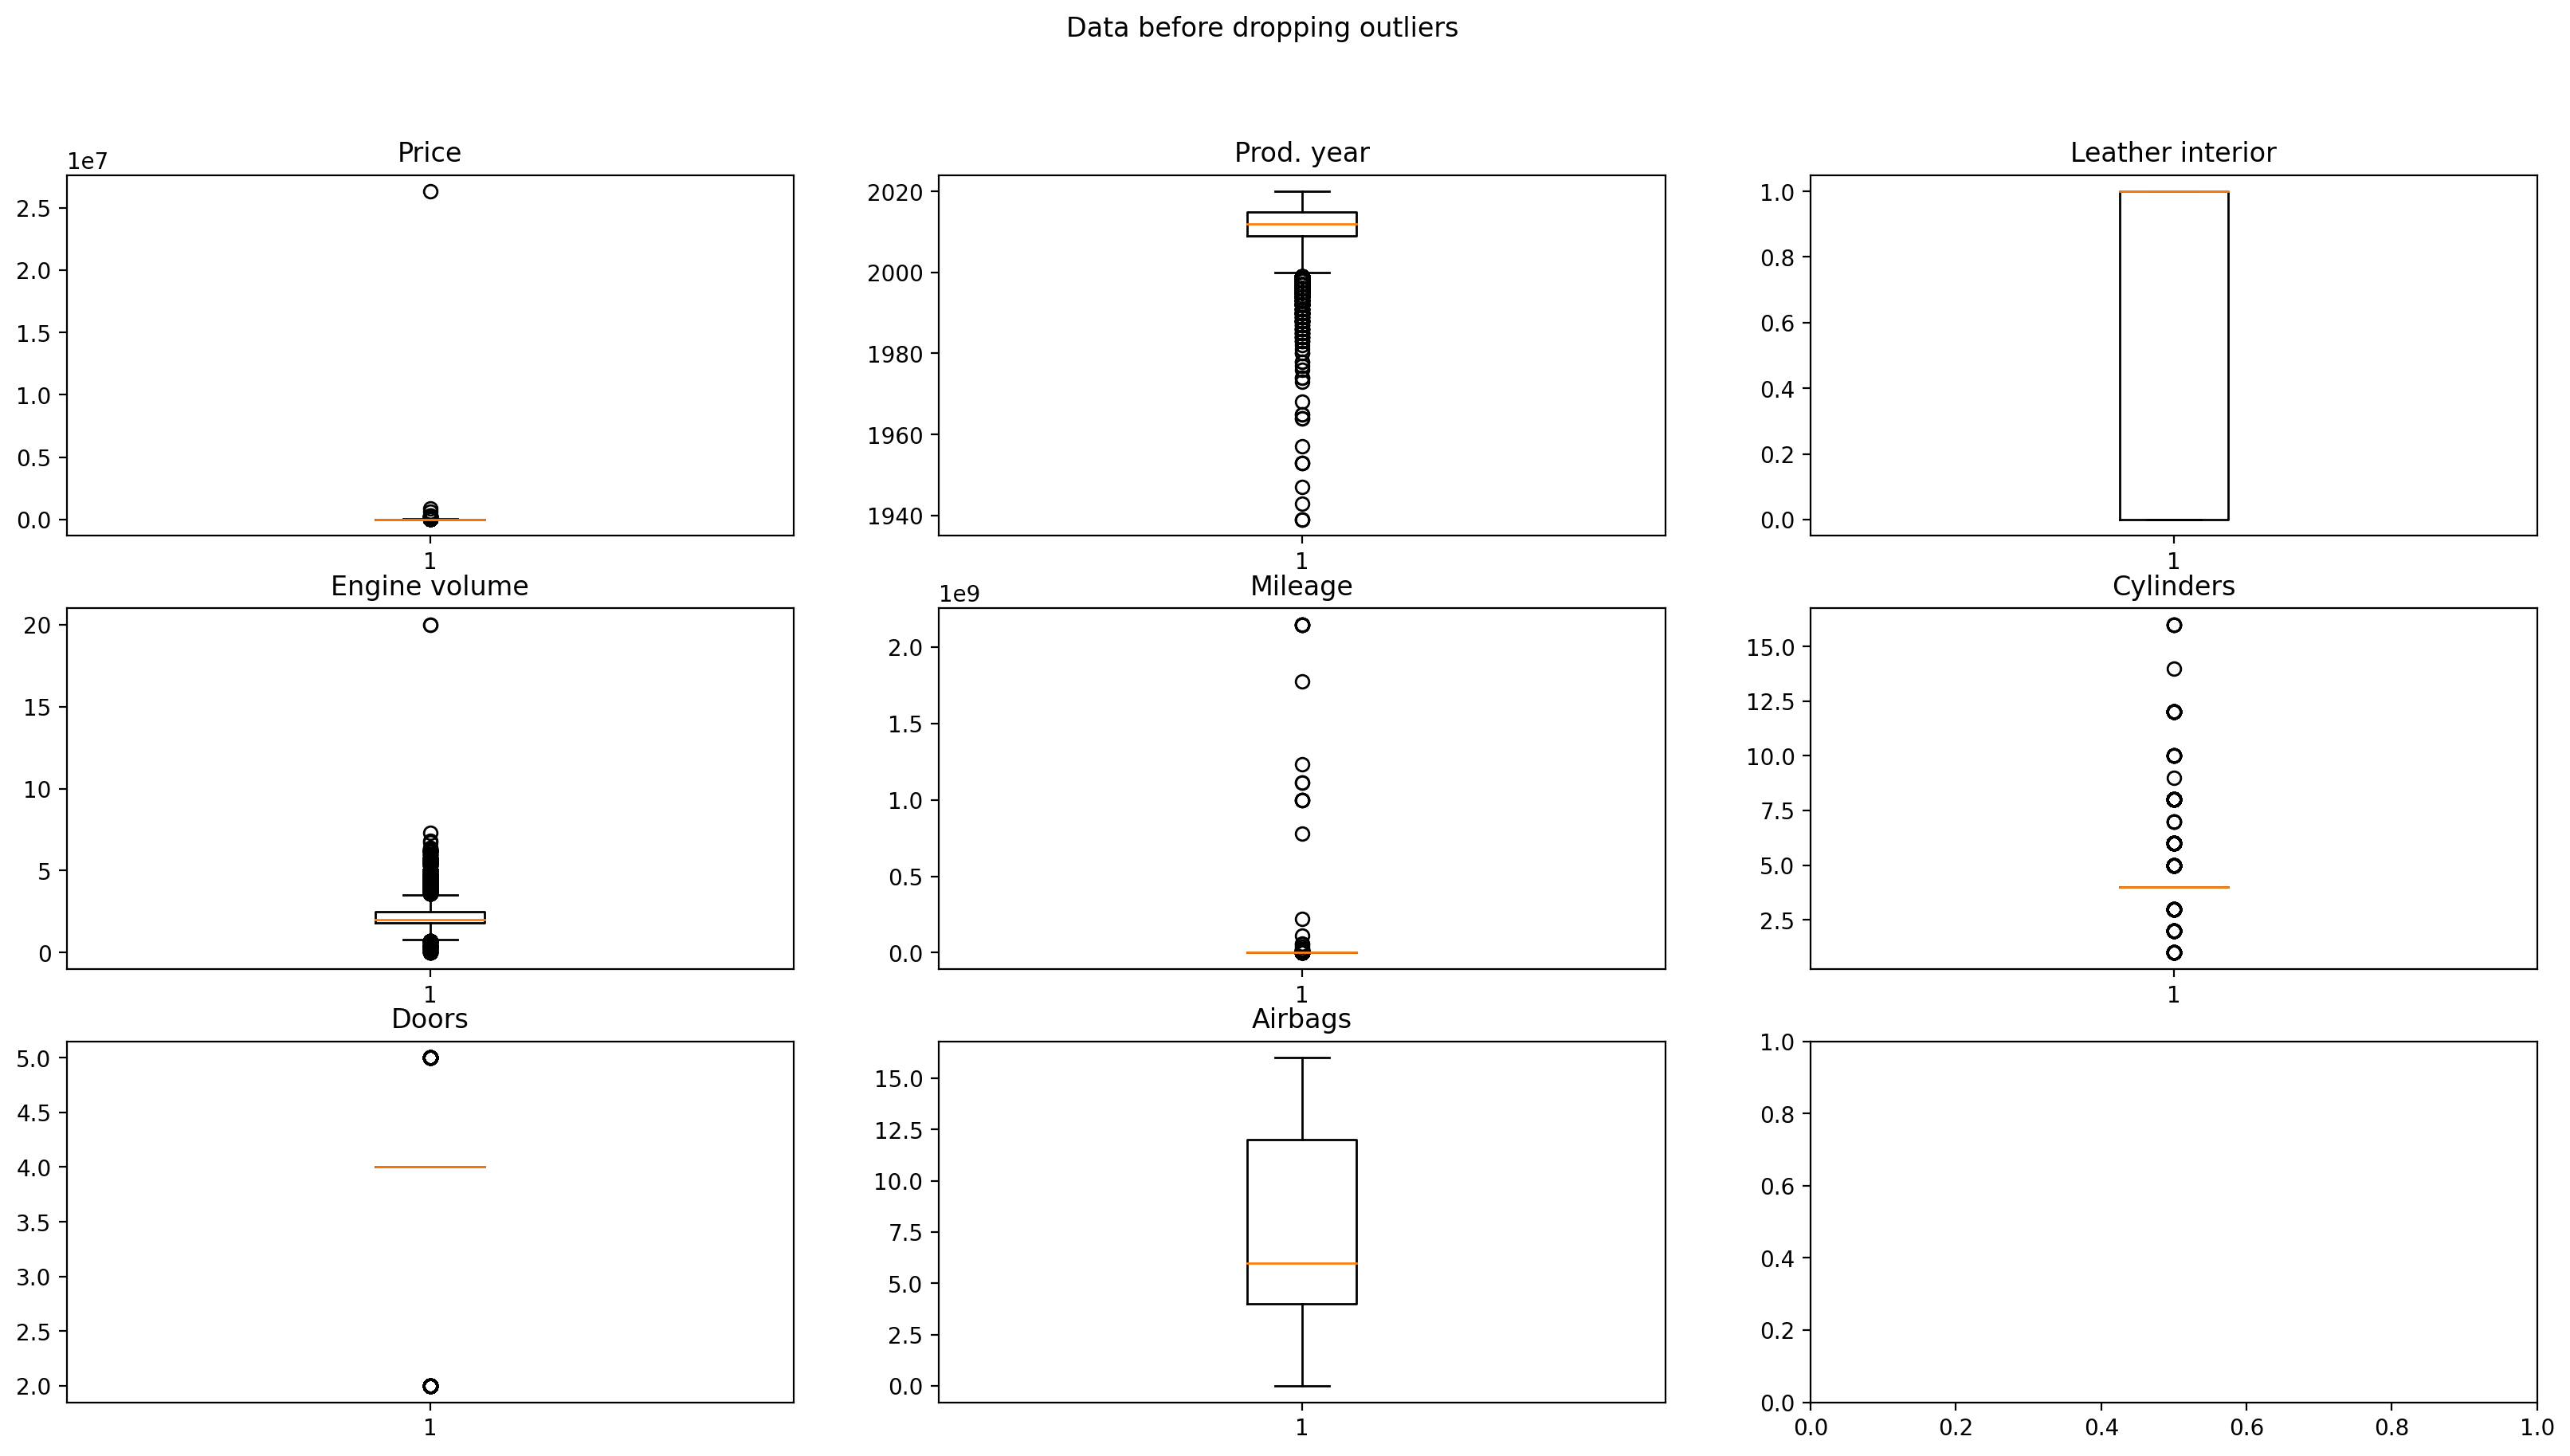

In [8]:
fig, axs = plt.subplots(3, 3)

fig.suptitle("Data before dropping outliers")
fig.set_dpi(200)
fig.set_size_inches(20, 10)
for index, column in enumerate(Y.columns):
    axs[int(index/3)][index%3].boxplot(Y[column])
    axs[int(index/3)][index%3].set_title(column)

## Preprocessing

We can appreciate various outliers in *Price*, *Engine Volume* and a few more. Let's drop them

In [9]:
for column in ["Price", "Prod. year", "Engine volume", "Mileage"]:
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(df_train[column]>=upper)[0]
    lower_array = np.where(df_train[column]<=lower)[0]
    
    # Removing the outliers
    df_train.drop(index=upper_array, inplace=True)
    df_train.drop(index=lower_array, inplace=True)
    df_train.reset_index(inplace=True, drop=True)

Y = df_train.select_dtypes(include = ["float64", "int64"])

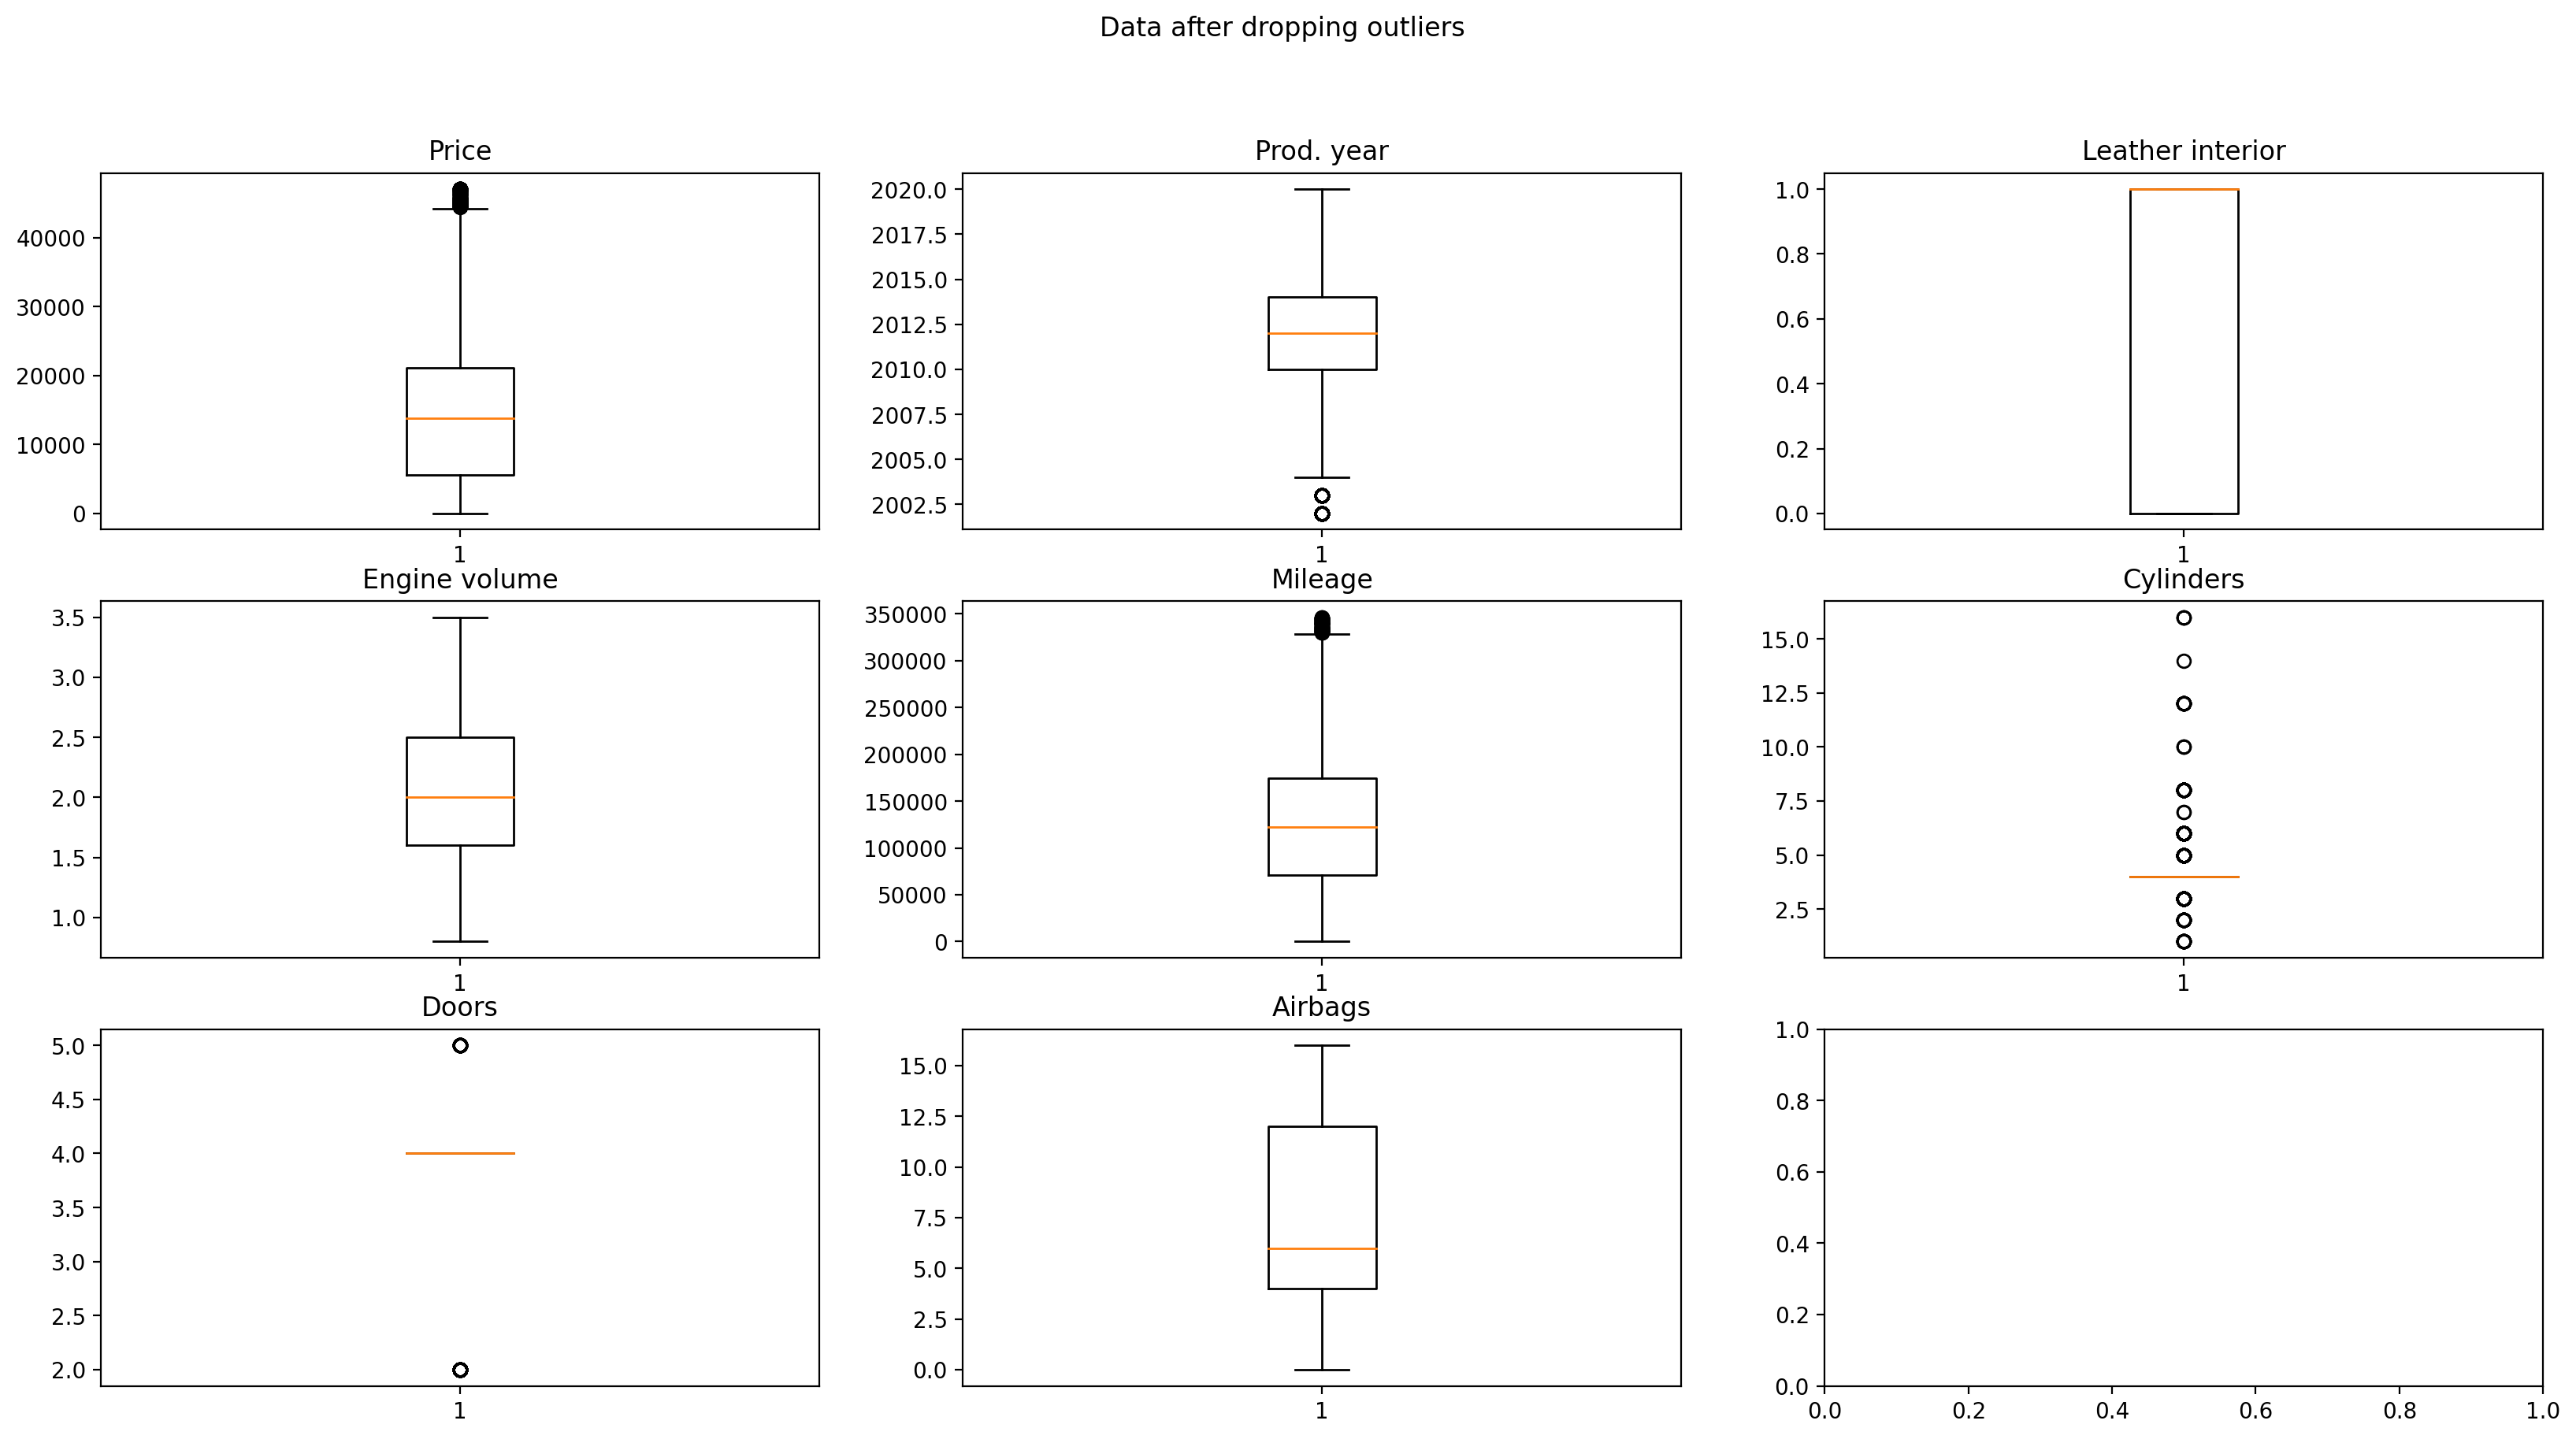

In [10]:
fig, axs = plt.subplots(3, 3)

fig.suptitle("Data after dropping outliers")
fig.set_dpi(200)
fig.set_size_inches(20, 10)

for index, column in enumerate(Y.columns):
    axs[int(index/3)][index%3].boxplot(Y[column])
    axs[int(index/3)][index%3].set_title(column)

This already looks like a much cleaner dataset. We could drop a lot of data that seems to be outlier, but we'll use all the data for the moment and worry later

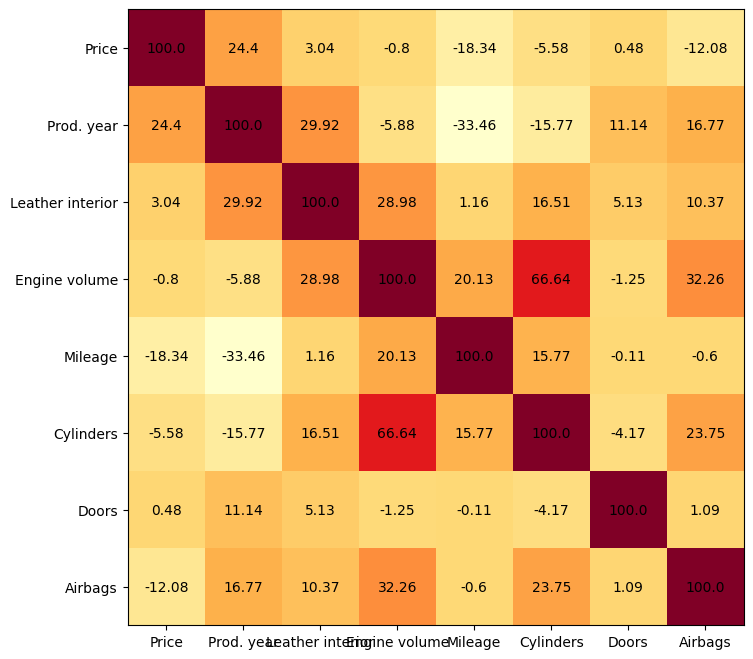

In [11]:
fig, ax = plt.subplots(figsize = (Y.shape[1], Y.shape[1]))
fig = plt.imshow(Y.corr(), cmap = "YlOrRd")
ax.set_xticks(range(Y.shape[1]))
ax.set_xticklabels(Y.axes[1])
ax.set_yticks(range(Y.shape[1]))
ax.set_yticklabels(Y.axes[1])
for (j,i),label in np.ndenumerate((Y.corr()*100).round(2)):
    ax.text(i,j,label,ha='center',va='center')
plt.show()

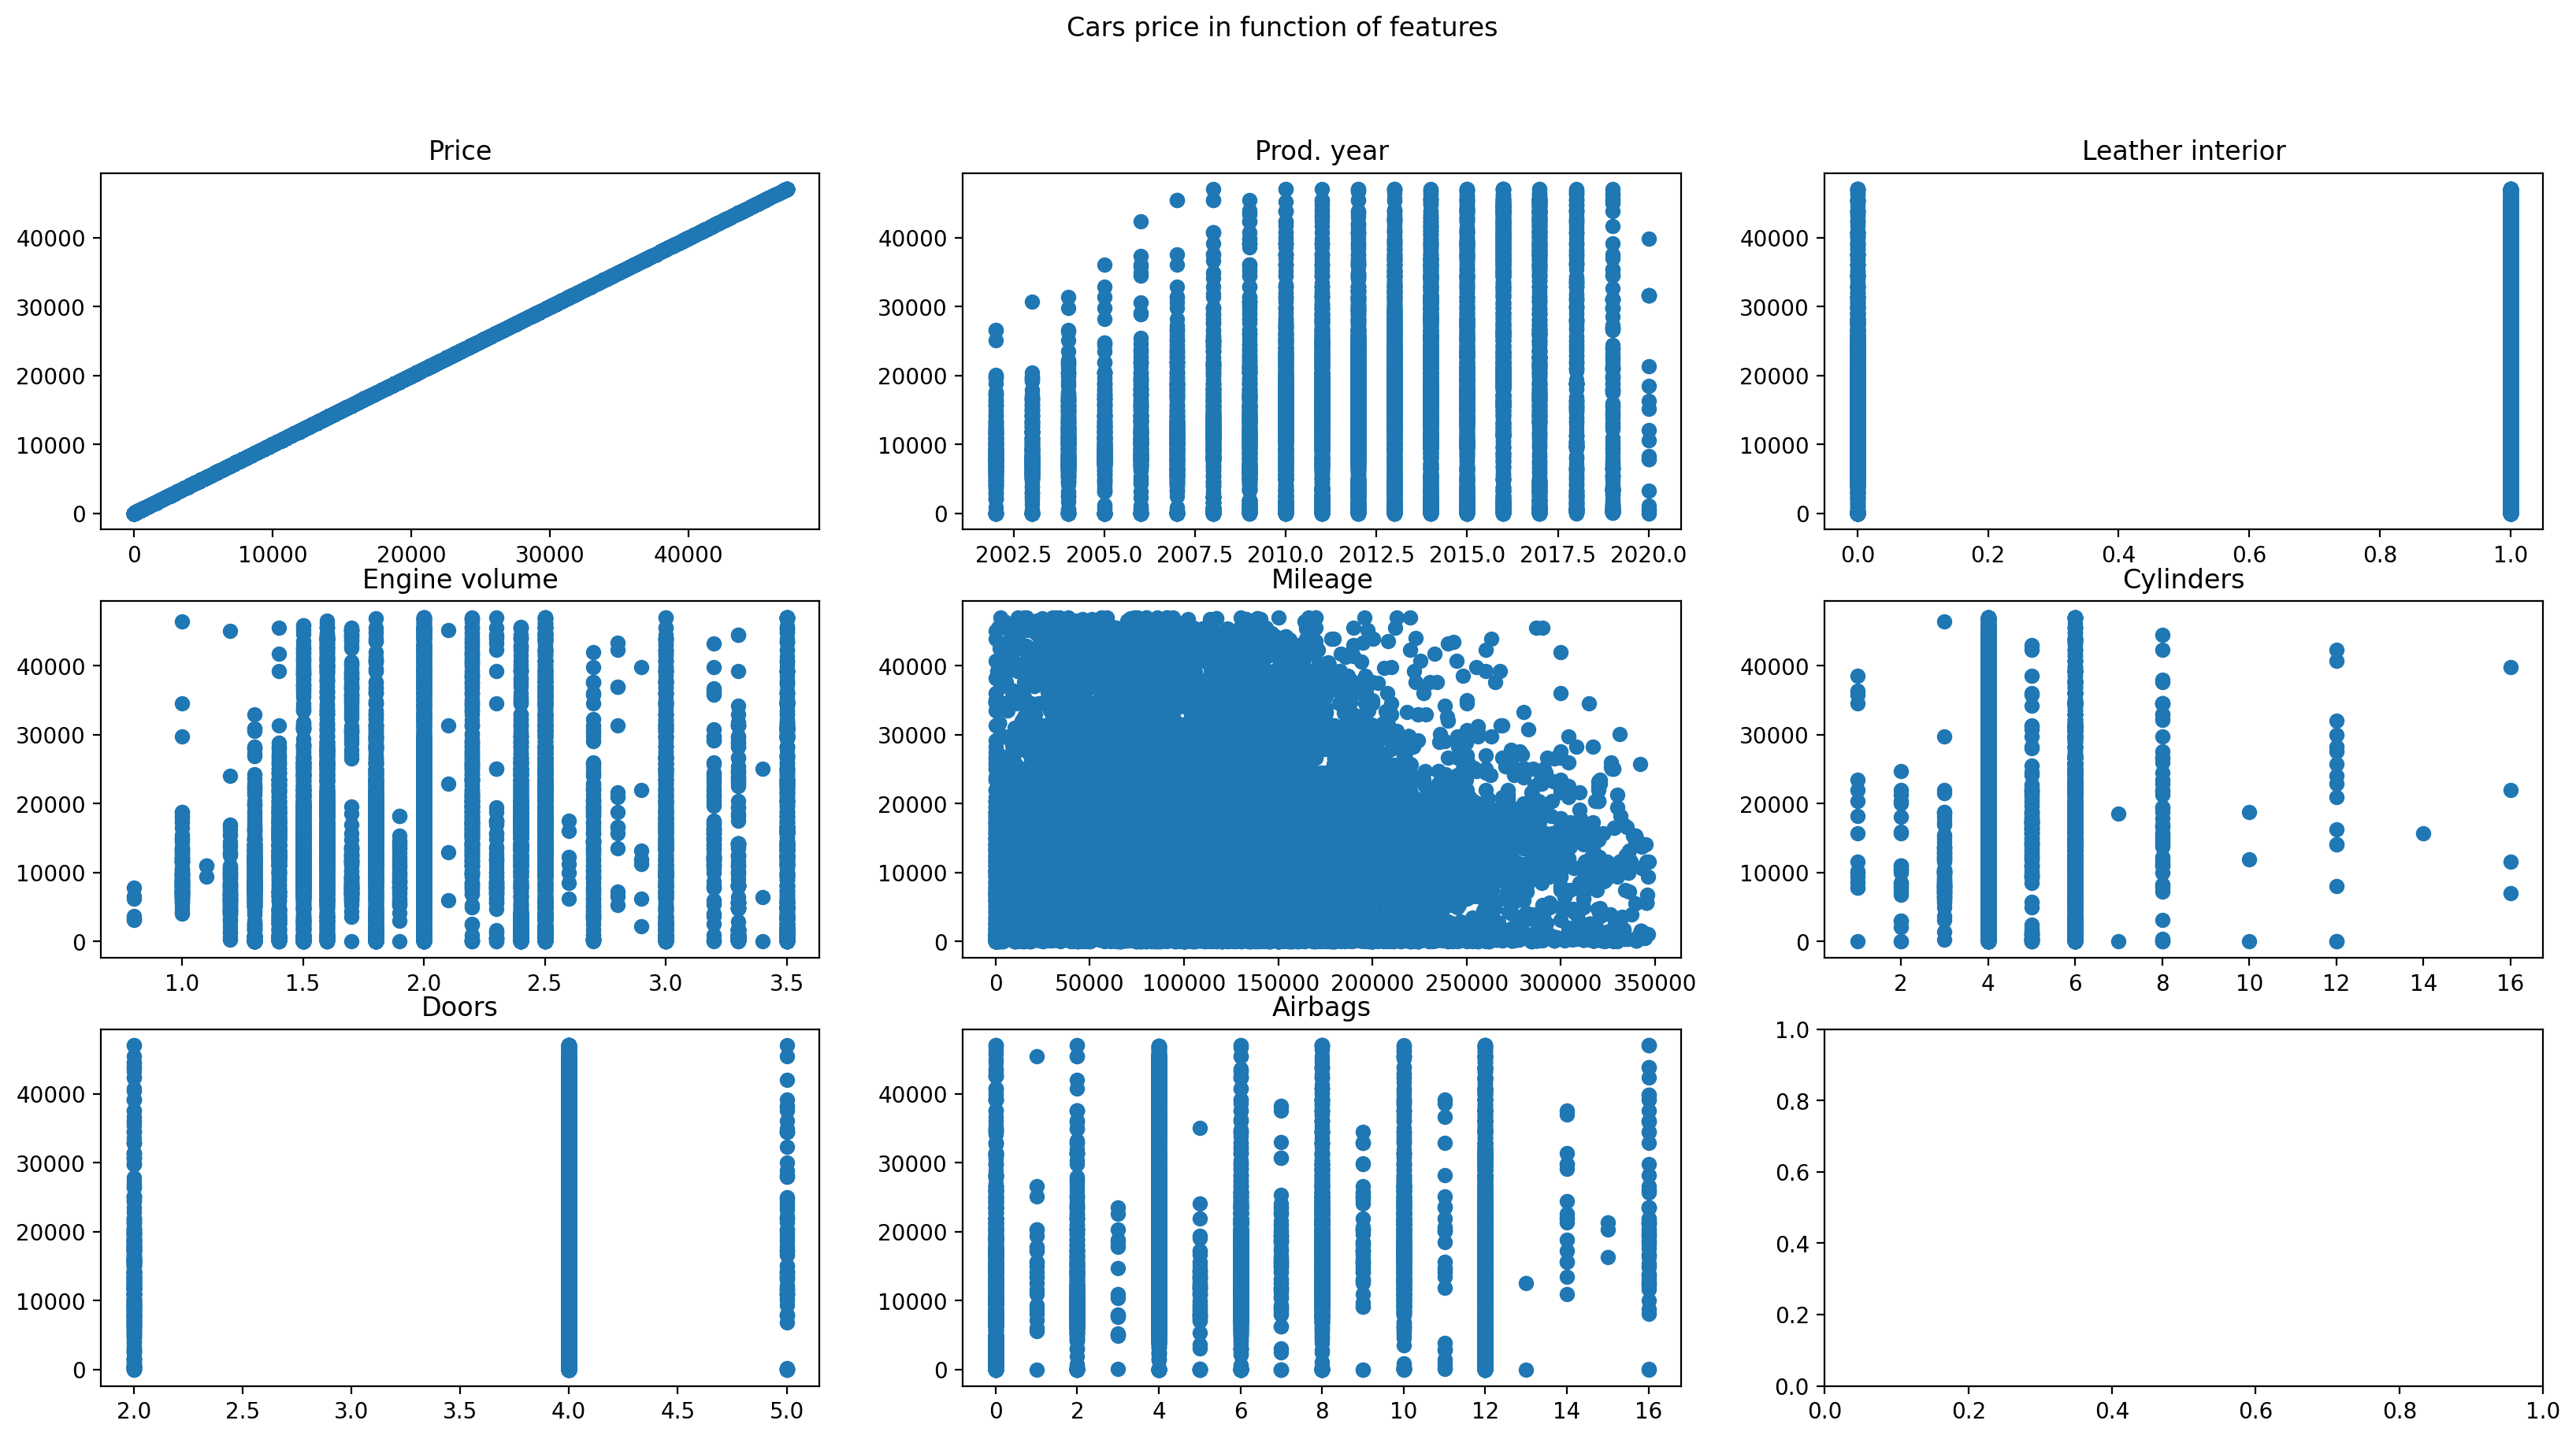

In [12]:
fig, axs = plt.subplots(3, 3)

fig.suptitle("Cars price in function of features")
fig.set_dpi(200)
fig.set_size_inches(20, 10)

for index, column in enumerate(Y.columns):
    axs[int(index/3)][index%3].scatter(Y[column], Y["Price"])
    axs[int(index/3)][index%3].set_title(column)

## Get extra features

This project is aimed at predicting car prices based on a few features. We can get extra features that could help us in the prediction. We'll use the jerarquical KMeans algorithm to get the clusters.

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

class GetExtraFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.dataset = None
        self.knownFeatures = []
        self.unknownFeatures = []
        
    def fit(self, X, y=None):
        self.dataset = X
        self.__assignFeatures__(X.columns)
        return self
    
    def __assignFeatures__(self, columns):
        self.knownFeatures = ["Manufacturer", "Model", "Color", "Prod. year", "Mileage", "Leather interior"]
        self.unknownFeatures = list((set(columns) - set(self.knownFeatures)) - {"Price"})
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        def transformRow(row):
            carModelInstance = self.dataset[
                (self.dataset["Manufacturer"]==row["Manufacturer"]) & 
                (self.dataset["Model"]==row["Model"])].iloc[0, :]
            newRow = pd.Series(index=self.knownFeatures+self.unknownFeatures)
            newRow[self.knownFeatures] = row[self.knownFeatures]
            newRow[self.unknownFeatures] = carModelInstance[self.unknownFeatures]
            
            return newRow
        
        X = X.apply(transformRow, axis=1)

        return X

In [14]:
getter = GetExtraFeatures()
getter.fit(df_train)


knownFeatures = ["Manufacturer", "Model", "Color", "Prod. year", "Mileage", "Leather interior"]
X = df_train[knownFeatures]

# getter.transform(X)

## Select and Train a Model

We'll construct a mixed model, in the form:
$$
f(\vec x) = c_1 \cdot f_1(\vec w) + (1-c_1) \cdot f_2(\vec x), \;\;\; \text{being} \;\;0 \leq c_1
$$
Where:
- $f_1$ is a linear model depending on mileage and production year.
- $f_2$ is a KNN trained dynamically on the instances of the same model.

In [15]:
df_train.dtypes[(df_train.dtypes!="float64") & (df_train.dtypes!="int64")].index

Index(['Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

In [167]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

X_train = df_train.drop("Price", axis=1)
y_train = df_train["Price"]
categoricalFeatures = list(X_train.dtypes[(X_train.dtypes!="float64") & (X_train.dtypes!="int64")].index)
numericFeatures = X_train.columns.difference(categoricalFeatures)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericFeatures),
        ('cat', OneHotEncoder(handle_unknown='infrequent_if_exist'), categoricalFeatures),
        
    ])

pipeline = Pipeline([
    # ('preprocessor', preprocessor),
    ('sgd_regressor', SGDRegressor(max_iter=1000))
])

para_grid = {
    'sgd_regressor__loss': ['squared_loss', 'huber'],
    'sgd_regressor__penalty': ['l2', 'l1', 'elasticnet'],
    'sgd_regressor__alpha': [1e-8, 1e-6, 1e-2, 5e-2],
    'sgd_regressor__epsilon': [1e-3, 1e-2, 0.1, 0.2, 0.3, 0.5]
}

search = GridSearchCV(pipeline, para_grid, n_jobs=-1, cv=5, scoring="neg_mean_squared_error")

In [168]:
search.fit(X_train[["Prod. year", "Mileage"]], y_train)

/home/joaquin/.local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/joaquin/.local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/joaquin/.local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/joaquin/.local/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/joaquin/.local/lib/pyt

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sgd_regressor', SGDRegressor())]),
             n_jobs=-1,
             param_grid={'sgd_regressor__alpha': [1e-08, 1e-06, 0.01, 0.05],
                         'sgd_regressor__epsilon': [0.001, 0.01, 0.1, 0.2, 0.3,
                                                    0.5],
                         'sgd_regressor__loss': ['squared_loss', 'huber'],
                         'sgd_regressor__penalty': ['l2', 'l1', 'elasticnet']},
             scoring='neg_mean_squared_error')

In [169]:
model = search.best_estimator_

In [171]:
X_test = clean(df_test).drop("Price", axis=1)
predictedPrice = model.predict(X_test[["Prod. year", "Mileage"]])

array([ 9.59856076e+03,  1.57465900e+04, -5.57778720e+03,  2.69301497e+03,
        1.10750558e+04,  1.03491931e+04,  3.26354367e+03,  4.98809189e+03,
        6.84397881e+03, -1.15855795e+02, -1.25703152e+04,  6.55427832e+03,
        1.60843181e+04, -5.96654814e+03,  1.18467777e+04,  2.11022645e+03,
        1.31898511e+04,  3.65888672e+03,  1.62071105e+04,  2.96584534e+03,
       -1.40856695e+03, -2.08011479e+03, -1.20753128e+03, -4.43115574e+03,
        1.07502213e+04,  1.11273285e+04,  5.08096410e+02, -7.19651872e+03,
        1.07438228e+04,  4.76208806e+03,  5.82218756e+03,  7.46927822e+03,
       -5.25202436e+03,  8.46936151e+02,  9.27609640e+03,  6.11724345e+03,
        6.57850137e+03, -1.07579175e+04,  5.91866295e+03,  5.93174925e+03,
       -5.38816434e+03,  2.61176047e+03,  1.60943374e+04,  3.51011065e+03,
       -7.30649179e+03, -1.08623573e+04,  3.77558809e+03, -2.41229369e+04,
        7.04255931e+03,  1.41446898e+04,  2.15855777e+03,  8.16365565e+03,
       -1.09475818e+03,  

In [150]:
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsRegressor 

def predictPrice_bySimilarity(X, df):
    def getSimilarCarsPrice(x, df):
        similarCars = df[(df["Manufacturer"]==x["Manufacturer"]) & (df["Model"]==x["Model"])]
        if similarCars.shape[0] == 0:
            return 13500
        onehot = OneHotEncoder(handle_unknown='ignore')
        similarCars = pd.concat([similarCars.drop(categoricalFeatures, axis=1), pd.DataFrame(onehot.fit_transform(similarCars[categoricalFeatures]).toarray())], axis=1)
        similarCars.columns = similarCars.columns.astype(str)
        similarCars.fillna(0, inplace=True)
        
        X_train = similarCars.drop("Price", axis=1)
        pca = PCA(n_components=min(10, similarCars.shape[0]))
        X_train = pca.fit_transform(X_train)
        
        # X_train = similarCars[["Prod. year", "Mileage"]]
        
        knn = KNeighborsRegressor(n_neighbors=min(5, similarCars.shape[0]))
        knn.fit(X_train, similarCars["Price"])
        
        # x = pd.DataFrame(x).T[["Prod. year", "Mileage"]]
        x = pd.DataFrame(x).T
        x = pd.concat([x.drop(categoricalFeatures, axis=1), pd.DataFrame(onehot.transform(x[categoricalFeatures]).toarray())], axis=1)
        x.columns = x.columns.astype(str)
        x.fillna(0, inplace=True)
        x = pca.transform(x)
        return knn.predict(x)[0]

    return X.apply(lambda x: getSimilarCarsPrice(x, df), axis=1)

In [173]:
def mixedPredict(X, c1, df):
    return c1*model.predict(X[["Prod. year", "Mileage"]]) + (1-c1)*predictPrice_bySimilarity(X, df)

prediction = mixedPredict(X_test.iloc[:200, :], 0.2, df_train)

In [174]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(df_test["Price"].iloc[:200], prediction)**(1/2)
mean_absolute_error(df_test["Price"].iloc[:200], prediction)

9182.012468241539

### Save model

In [175]:
from joblib import dump

dump(model, "model.joblib")

['model.joblib']

# License

This Jupyter Notebook and its contents are licensed under the terms of the GNU General Public License Version 2 as published by the Free Software Foundation. The full text of the license can be found at: https://www.gnu.org/licenses/gpl-2.0.html

Copyright (c) 2024, Joaquín Mateos Barroso

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see https://www.gnu.org/licenses/ for a list of additional licenses.